In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Cases & Deaths Data

In [2]:
# import cases_deaths_data as a Pandas DataFrame

cases_deaths_data = pd.read_csv('Cases_Deaths_Data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
cases_deaths_data.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,06/11/2021,TX,2965966,NaN,NaN,1463,355.0,51158,NaN,NaN,17,0.0,06/13/2021 12:00:00 AM,Not agree,Not agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,10/22/2020,MP,88,88.0,0.0,0,0.0,2,2.0,0.0,0,0.0,10/23/2020 01:44:31 PM,Agree,Agree
4,08/12/2020,AS,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,08/13/2020 02:12:28 PM,NaN,NaN


In [3]:
cases_deaths_data.shape

(33300, 15)

In [4]:
cases_deaths_data.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,3.330000e+04,1.653400e+04,16463.000000,33300.000000,29015.000000,33300.000000,17003.000000,17003.000000,33300.000000,28955.000000
mean,2.453707e+05,2.823534e+05,32513.244427,1043.517027,144.682337,4906.497508,5926.048815,571.760689,18.141922,1.705370
std,4.701773e+05,4.740508e+05,50706.743324,2521.504514,499.536969,8609.206217,8613.704719,981.266203,47.814947,31.151105
min,0.000000e+00,0.000000e+00,0.000000,-33355.000000,-33864.000000,0.000000,0.000000,0.000000,-1474.000000,-2594.000000
25%,2.509000e+03,2.114475e+04,112.500000,19.000000,0.000000,55.000000,565.000000,0.000000,0.000000,0.000000
50%,6.249850e+04,1.135900e+05,5800.000000,270.000000,3.000000,1308.500000,2739.000000,153.000000,3.000000,0.000000
75%,3.014992e+05,3.745122e+05,41657.000000,1007.000000,109.000000,6158.000000,8041.000000,699.500000,17.000000,1.000000
max,3.994499e+06,3.830008e+06,246231.000000,63016.000000,17065.000000,63891.000000,63891.000000,5107.000000,1667.000000,2919.000000


In [5]:
cases_deaths_data.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [6]:
cases_deaths_data.submission_date.describe()

count          33300
unique           555
top       05/12/2021
freq              60
Name: submission_date, dtype: object

## Data Cleaning

### Cleaning: Date --> Datetime

In [7]:
# convert dates to datetime data type with standard date format

cases_deaths_data.submission_date = pd.to_datetime(cases_deaths_data.submission_date, infer_datetime_format=True)
cases_deaths_data.submission_date.describe()

<ipython-input-7-b5e9e2b08b59>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cases_deaths_data.submission_date.describe()


count                   33300
unique                    555
top       2020-10-28 00:00:00
freq                       60
first     2020-01-22 00:00:00
last      2021-07-29 00:00:00
Name: submission_date, dtype: object

In [8]:
# identify first and last date included in dataset

cases_deaths_start_date = cases_deaths_data.submission_date.min()
cases_deaths_end_date = cases_deaths_data.submission_date.max()
print('Start Date:', cases_deaths_start_date)
print('End Date:', cases_deaths_end_date)

Start Date: 2020-01-22 00:00:00
End Date: 2021-07-29 00:00:00


### Cleaning: Remove all variables except 'submission_date', 'state', 'tot_cases', 'new_case', 'tot_death', 'new_death'

In [9]:
# remove all variables other than ['submission_date','state','tot_cases','new_case','tot_death','new_death']

cases_deaths_data = cases_deaths_data[['submission_date','state','tot_cases','new_case','tot_death','new_death']]
cases_deaths_data.head()

,submission_date,state,tot_cases,new_case,tot_death,new_death
0,2021-03-11,KS,297229,0,4851,0
1,2021-06-11,TX,2965966,1463,51158,17
2,2020-02-04,AR,0,0,0,0
3,2020-10-22,MP,88,0,2,0
4,2020-08-12,AS,0,0,0,0


### Cleaning: Combine NY and NYC data into a single time-series

In [10]:
print(len(cases_deaths_data.state.unique()))
cases_deaths_data.state.unique()

# too many jurisdictions, need to combine NY and NYC and also filter down to just 50 States + DC

60


array(['KS', 'TX', 'AR', 'MP', 'AS', 'HI', 'AK', 'NYC', 'PW', 'GA', 'MA',
       'OK', 'CO', 'PR', 'UT', 'WV', 'FL', 'TN', 'NY', 'SD', 'NM', 'OH',
       'IA', 'PA', 'RMI', 'NE', 'AL', 'WI', 'ND', 'GU', 'IN', 'MI', 'CT',
       'NC', 'MO', 'CA', 'MS', 'ME', 'VT', 'IL', 'NV', 'VI', 'WA', 'DE',
       'MD', 'MT', 'NH', 'ID', 'OR', 'FSM', 'NJ', 'DC', 'RI', 'SC', 'MN',
       'KY', 'AZ', 'LA', 'VA', 'WY'], dtype=object)

In [11]:
# NY Slice

NY_data = cases_deaths_data[cases_deaths_data.state == 'NY']
NY_data.tot_cases.max()

1170157

In [12]:
# NYC Slice

NYC_data = cases_deaths_data[cases_deaths_data.state == 'NYC']
NYC_data.tot_cases.max()

974555

In [13]:
# append NYC to NY, and groupby date, then sum 
combined_NY_data = NY_data.append(NYC_data).groupby('submission_date').sum()
combined_NY_data['state'] = 'NY'
columns = combined_NY_data.columns.tolist()
columns = columns[-1:] + columns[:-1]
combined_NY_data = combined_NY_data[columns].reset_index()
combined_NY_data

,submission_date,state,tot_cases,new_case,tot_death,new_death
0,2020-01-22,NY,0,0,0,0
1,2020-01-23,NY,0,0,0,0
2,2020-01-24,NY,0,0,0,0
3,2020-01-25,NY,0,0,0,0
4,2020-01-26,NY,0,0,0,0
...,...,...,...,...,...,...
550,2021-07-25,NY,2136170,1882,53484,10
551,2021-07-26,NY,2137731,1561,53489,5
552,2021-07-27,NY,2139700,1969,53492,3
553,2021-07-28,NY,2142112,2412,53503,11


In [14]:
# confirm combined NY dataset is correct

print(combined_NY_data.tot_cases.max() == NY_data.tot_cases.max() + NYC_data.tot_cases.max())
print(combined_NY_data.tot_death.max() == NY_data.tot_death.max() + NYC_data.tot_death.max())

True
True


In [15]:
# remove NY and NYC data from original dataset

print(len(cases_deaths_data.state.unique()))
cases_deaths_data = cases_deaths_data[cases_deaths_data.state != 'NY']
print(len(cases_deaths_data.state.unique()))
cases_deaths_data = cases_deaths_data[cases_deaths_data.state != 'NYC']
print(len(cases_deaths_data.state.unique()))
cases_deaths_data.state.unique()

60
59
58


array(['KS', 'TX', 'AR', 'MP', 'AS', 'HI', 'AK', 'PW', 'GA', 'MA', 'OK',
       'CO', 'PR', 'UT', 'WV', 'FL', 'TN', 'SD', 'NM', 'OH', 'IA', 'PA',
       'RMI', 'NE', 'AL', 'WI', 'ND', 'GU', 'IN', 'MI', 'CT', 'NC', 'MO',
       'CA', 'MS', 'ME', 'VT', 'IL', 'NV', 'VI', 'WA', 'DE', 'MD', 'MT',
       'NH', 'ID', 'OR', 'FSM', 'NJ', 'DC', 'RI', 'SC', 'MN', 'KY', 'AZ',
       'LA', 'VA', 'WY'], dtype=object)

In [16]:
# confirm compatibility with format of combined_NY_data before concatenation with cases_deaths_data
print(cases_deaths_data.shape)
print(combined_NY_data.shape)

cases_deaths_data.columns == combined_NY_data.columns

(32190, 6)
(555, 6)


array([ True,  True,  True,  True,  True,  True])

In [17]:
# concatenate combined_NY_data back into primary dataset:

print(len(cases_deaths_data.state.unique()))
cases_deaths_data = pd.concat([cases_deaths_data, combined_NY_data], ignore_index=True)
print(len(cases_deaths_data.state.unique()))
cases_deaths_data[cases_deaths_data.state == 'NY']

58
59


,submission_date,state,tot_cases,new_case,tot_death,new_death
32190,2020-01-22,NY,0,0,0,0
32191,2020-01-23,NY,0,0,0,0
32192,2020-01-24,NY,0,0,0,0
32193,2020-01-25,NY,0,0,0,0
32194,2020-01-26,NY,0,0,0,0
...,...,...,...,...,...,...
32740,2021-07-25,NY,2136170,1882,53484,10
32741,2021-07-26,NY,2137731,1561,53489,5
32742,2021-07-27,NY,2139700,1969,53492,3
32743,2021-07-28,NY,2142112,2412,53503,11


### Cleaning: Now that 'NY' and 'NYC' are merged into 'NY', filter down dataset to just include 50 official states and Washington DC

In [18]:
# Official 50 states PLUS District of Columbia
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA',
          'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
          'MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
          'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
          'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY',
          'DC']
len(states)

51

In [19]:
# filter dataset down to just the 50 official states plus DC and group by state
cases_deaths_by_state = cases_deaths_data[cases_deaths_data['state'].isin(states)].groupby('state')
print(len(cases_deaths_by_state))

51


In [20]:
# review filtered dataset

cases_deaths_by_state[['tot_cases', 'tot_death']].max().sort_values('tot_cases', ascending=False)

,tot_cases,tot_death
state,,
CA,3994499,63891
TX,3096756,51984
FL,2569016,38971
NY,2144712,53508
IL,1417263,25908
PA,1223390,27842
GA,1175845,21665
OH,1126625,20490
NC,1044877,13618


### Cleaning: Create US National Totals based on filtered list of States

In [21]:
# create national aggregation of total cases by date
US_tot_cases_deaths = cases_deaths_data.groupby('submission_date').sum()
US_tot_cases_deaths

,tot_cases,new_case,tot_death,new_death
submission_date,,,,
2020-01-22,33,33,0,0
2020-01-23,35,2,0,0
2020-01-24,36,1,0,0
2020-01-25,39,3,0,0
2020-01-26,42,3,0,0
...,...,...,...,...
2021-07-25,34527680,53321,608859,137
2021-07-26,34574654,46920,609116,247
2021-07-27,34653065,77987,609532,409


In [22]:
US_tot_cases_deaths.tot_cases.max()

34818278

In [23]:
US_tot_cases_deaths.tot_death.max()

610264

### Cleaning: Add 7-day (trailing) moving average versions of 'new_case' and 'new_death'

In [24]:
# create a 7-day moving average for new cases by date

US_tot_cases_deaths['new_case_7day_avg'] = [US_tot_cases_deaths.new_case[max(x-7,0):x].mean() for x in range(1,len(US_tot_cases_deaths)+1)]
US_tot_cases_deaths['new_death_7day_avg'] = [US_tot_cases_deaths.new_death[max(x-7,0):x].mean() for x in range(1,len(US_tot_cases_deaths)+1)]
US_tot_cases_deaths

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2020-01-22,33,33,0,0,33.000000,0.000000
2020-01-23,35,2,0,0,17.500000,0.000000
2020-01-24,36,1,0,0,12.000000,0.000000
2020-01-25,39,3,0,0,9.750000,0.000000
2020-01-26,42,3,0,0,8.400000,0.000000
...,...,...,...,...,...,...
2021-07-25,34527680,53321,608859,137,56270.857143,255.714286
2021-07-26,34574654,46920,609116,247,58072.714286,263.428571
2021-07-27,34653065,77987,609532,409,62322.714286,283.571429


# Data Analysis: National Cases & Deaths

## Visualize National Case Data - Time Series

(0.0, 75000.0)

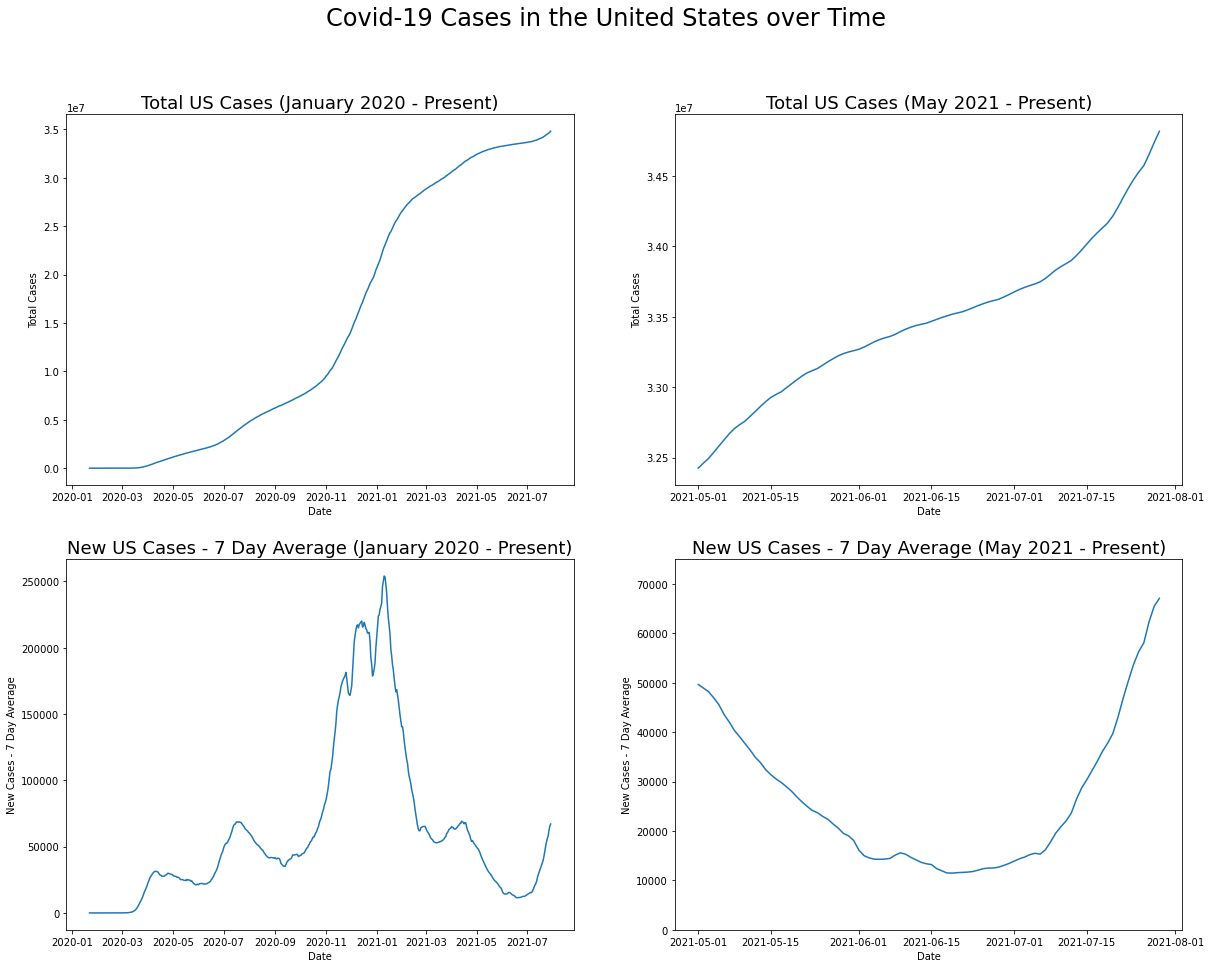

In [25]:
# Plot US Case Data

fig, ax = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Covid-19 Cases in the United States over Time', fontsize=24)
# Total US Cases over Time (Entire Pandemic)
ax[0][0].plot(US_tot_cases_deaths.tot_cases)
ax[0][0].set_title('Total US Cases (January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Cases')
# Total US Cases over Time (last 3 months)
ax[0][1].plot(US_tot_cases_deaths.tot_cases['2021-05':])
ax[0][1].set_title('Total US Cases (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Cases')

# New US Cases over Time (Entire Pandemic)
ax[1][0].plot(US_tot_cases_deaths.new_case_7day_avg)
ax[1][0].set_title('New US Cases - 7 Day Average (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('New Cases - 7 Day Average')
# New US Cases over Time (last 3 months)
ax[1][1].plot(US_tot_cases_deaths.new_case_7day_avg['2021-05':])
ax[1][1].set_title('New US Cases - 7 Day Average (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('New Cases - 7 Day Average')
ax[1][1].set_ylim([0,75000])

## Visualize National Death Data - Time Series

(0.0, 750.0)

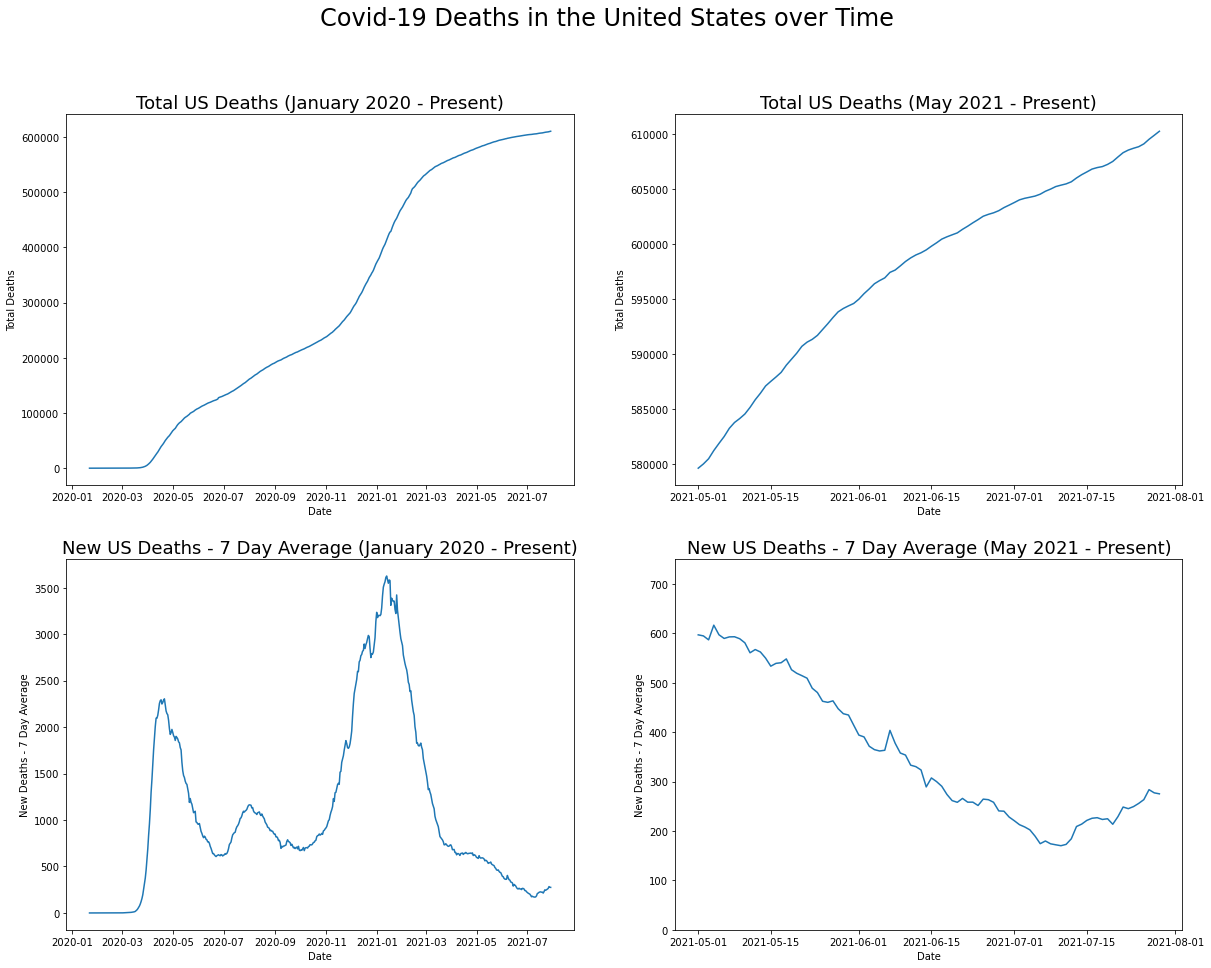

In [26]:
# Plot US Death Data

fig, ax = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Covid-19 Deaths in the United States over Time', fontsize=24)
# Total US Deaths over Time (Entire Pandemic)
ax[0][0].plot(US_tot_cases_deaths.tot_death)
ax[0][0].set_title('Total US Deaths (January 2020 - Present)', fontsize=18)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Total Deaths')
# Total US Deaths over Time (last 3 months)
ax[0][1].plot(US_tot_cases_deaths.tot_death['2021-05':])
ax[0][1].set_title('Total US Deaths (May 2021 - Present)', fontsize=18)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Total Deaths')

# New US Deaths over Time (Entire Pandemic)
ax[1][0].plot(US_tot_cases_deaths.new_death_7day_avg)
ax[1][0].set_title('New US Deaths - 7 Day Average (January 2020 - Present)', fontsize=18)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('New Deaths - 7 Day Average')
# New US Deaths over Time (last 3 months)
ax[1][1].plot(US_tot_cases_deaths.new_death_7day_avg['2021-05':])
ax[1][1].set_title('New US Deaths - 7 Day Average (May 2021 - Present)', fontsize=18)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('New Deaths - 7 Day Average')
ax[1][1].set_ylim([0,750])

### Identify Peak of 1st Wave

In [27]:
# peak cases of the 1st wave
US_tot_cases_deaths[US_tot_cases_deaths.new_case == US_tot_cases_deaths[:'2020-05'].new_case.max()]

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2020-04-09,505425,35058,20818,2249,31272.0,1881.857143


In [28]:
# peak deaths of the 1st wave
US_tot_cases_deaths[US_tot_cases_deaths.new_death == US_tot_cases_deaths[:'2020-05'].new_death.max()].head(1)

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2020-04-15,673960,25649,34350,2706,29084.714286,2254.428571


### Identify Peak of 2nd Wave

In [29]:
# peak cases of the 2nd wave
US_tot_cases_deaths[US_tot_cases_deaths.new_case == US_tot_cases_deaths['2020-06':'2020-09'].new_case.max()]

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2020-07-17,3862444,79332,144609,1020,68645.857143,927.0


In [30]:
# peak deaths of the 2nd wave
US_tot_cases_deaths[US_tot_cases_deaths.new_death == US_tot_cases_deaths['2020-06':'2020-09'].new_death.max()]

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2020-07-30,4685903,66664,158881,1378,61694.0,1139.428571


### Identify Peak of 3rd Wave

In [31]:
# peak cases of the 3rd wave
US_tot_cases_deaths[US_tot_cases_deaths.new_case == US_tot_cases_deaths[:].new_case.max()]

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2021-01-07,22111628,295872,392665,4151,233812.428571,3281.428571


In [32]:
# peak deaths of the 3rd wave
US_tot_cases_deaths[US_tot_cases_deaths.new_death == US_tot_cases_deaths[:].new_death.max()]

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2021-01-19,24618123,174815,433449,4593,193759.571429,3386.857143


# Correlation of Cases and Deaths

In [33]:
# identify date of first official case:

US_tot_cases_deaths.head()

,tot_cases,new_case,tot_death,new_death,new_case_7day_avg,new_death_7day_avg
submission_date,,,,,,
2020-01-22,33,33,0,0,33.00,0.0
2020-01-23,35,2,0,0,17.50,0.0
2020-01-24,36,1,0,0,12.00,0.0
2020-01-25,39,3,0,0,9.75,0.0
2020-01-26,42,3,0,0,8.40,0.0


### Visualize Cases and Deaths with Stacked Plots

Text(0, 0.5, 'Daily Deaths')

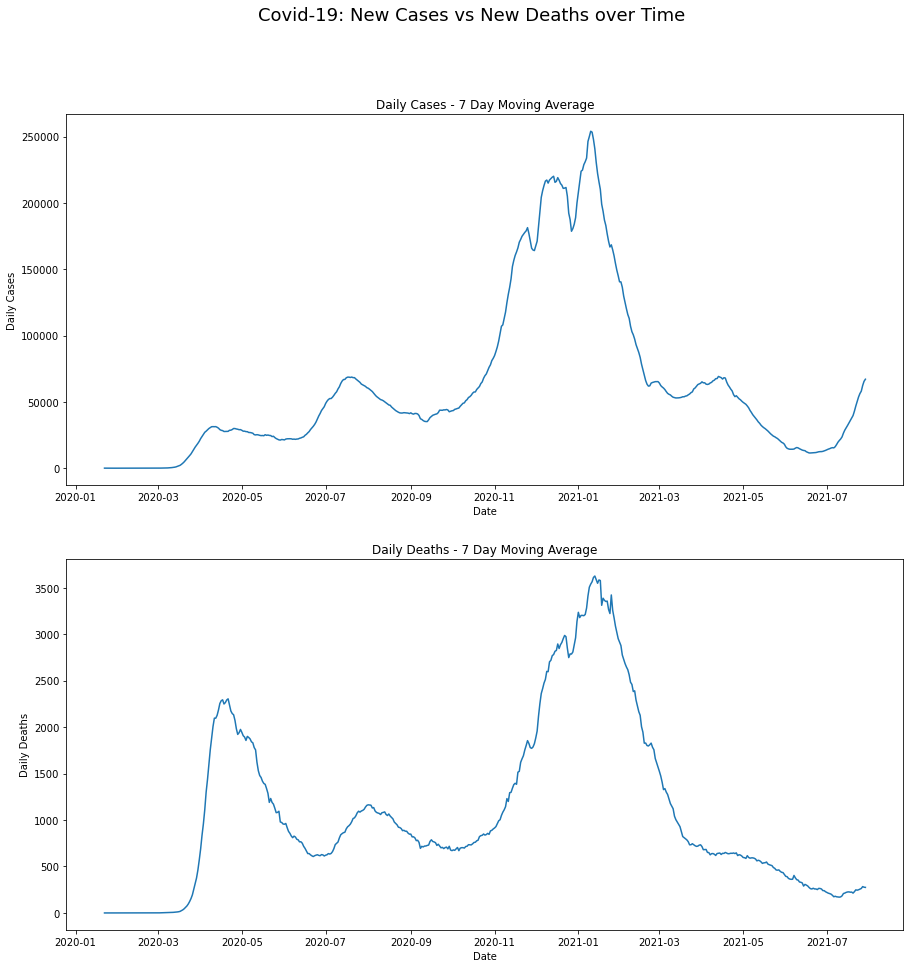

In [34]:
# overlay case data and death data on same graph, log scale

fig, ax = plt.subplots(2, 1, figsize = (15,15))
fig.suptitle('Covid-19: New Cases vs New Deaths over Time', fontsize=18)
# plot cases
ax[0].plot(US_tot_cases_deaths.new_case_7day_avg)
ax[0].set_title('Daily Cases - 7 Day Moving Average')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Daily Cases')
# plot deaths
ax[1].plot(US_tot_cases_deaths.new_death_7day_avg)
ax[1].set_title('Daily Deaths - 7 Day Moving Average')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Deaths')

### Overlay Cases and Deaths on the Same Plot with Log Scale

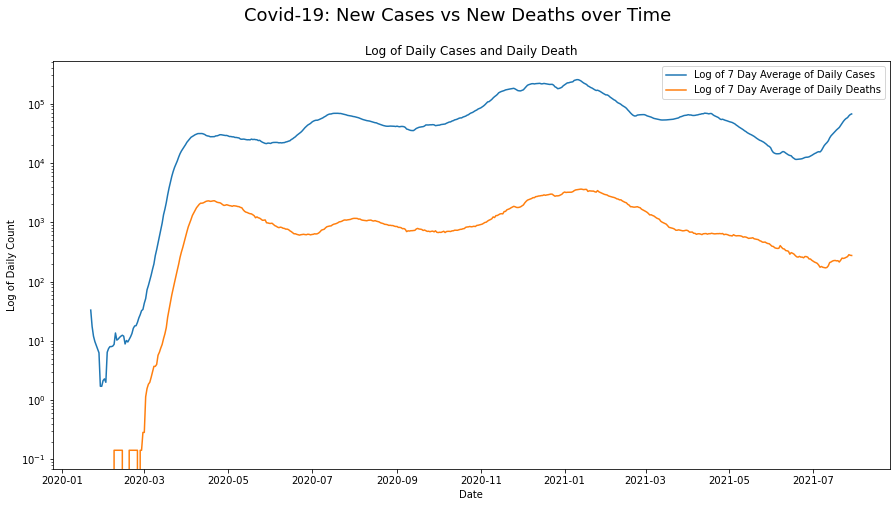

In [35]:
# overlay case data and death data on same graph, log scale

fig, ax = plt.subplots(figsize = (15,7.5))
fig.suptitle('Covid-19: New Cases vs New Deaths over Time', fontsize=18)
ax.plot(US_tot_cases_deaths.new_case_7day_avg, label = 'Log of 7 Day Average of Daily Cases')
ax.plot(US_tot_cases_deaths.new_death_7day_avg, label = 'Log of 7 Day Average of Daily Deaths')
ax.set_title('Log of Daily Cases and Daily Death')
ax.set_xlabel('Date')
ax.set_ylabel('Log of Daily Count')
ax.set_yscale('log')
ax.legend()

In [36]:
# Correlation Matrix for US_new_cases_avg and US_new_deaths_avg

d = {'US_new_cases_avg': US_tot_cases_deaths.new_case_7day_avg, 'US_new_deaths_avg': US_tot_cases_deaths.new_death_7day_avg}
US_cases_deaths_df = pd.DataFrame(data=d)
US_cases_deaths_df.corr()

,US_new_cases_avg,US_new_deaths_avg
US_new_cases_avg,1.000000,0.820818
US_new_deaths_avg,0.820818,1.000000


# Vaccine Data

In [37]:
# import vaccine_data as a Pandas DataFrame

vaccine_data = pd.read_csv('Vaccine_Data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
vaccine_data.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Series_Complete_FedLTC,Series_Complete_FedLTC_Residents,Series_Complete_FedLTC_Staff,Series_Complete_FedLTC_Unknown
0,07/29/2021,30,SC,5524045,313300,2420580,2790165,0,107290,124979,...,1066712,240,25716,308351,388001,161,44060,24114,13925,6021
1,07/29/2021,30,NC,12107370,646500,5024280,6436590,0,115439,134743,...,2292039,52,41802,651458,656269,35,90576,47818,29595,13163
2,07/29/2021,30,MT,1133925,69600,505200,559125,0,106095,123575,...,213229,238,8208,77632,74734,133,8764,4448,2900,1416
3,07/29/2021,30,SD,992885,59400,442040,491445,0,112234,134519,...,196007,18,3931,67562,59783,11,5271,3115,736,1420
4,07/29/2021,30,US,397464625,21484400,164366000,211594875,19350,119720,140177,...,79630251,84116,2098086,20827015,20751101,37157,3202409,1586144,1131414,484851


In [38]:
# review column headers

print("Column headers: ")
vaccine_data.columns

Column headers: 


Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_12Plus',
       'Distributed_Per_100k_18Plus', 'Distributed_Per_100k_65Plus',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Administered_Fed_LTC',
       'Administered_Fed_LTC_Residents', 'Administered_Fed_LTC_Staff',
       'Administered_Fed_LTC_Unk', 'Administered_Fed_LTC_Dose1',
       'Administered_Fed_LTC_Dose1_Residents',
       'Administered_Fed_LTC_Dose1_Staff', 'Administered_Fed_LTC_Dose1_Unk',
       'Admin_Per_100K', 'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_12Plus'

In [39]:
vaccine_data.describe()

,MMWR_week,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,...,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Series_Complete_FedLTC,Series_Complete_FedLTC_Residents,Series_Complete_FedLTC_Staff,Series_Complete_FedLTC_Unknown
count,14788.000000,1.478800e+04,1.478800e+04,1.478800e+04,1.478800e+04,14788.000000,14788.000000,14788.000000,14788.000000,1.478800e+04,...,1.478800e+04,14788.000000,1.478800e+04,1.478800e+04,1.478800e+04,1.478800e+04,1.478800e+04,1.478800e+04,1.478800e+04,14788.000000
mean,18.507371,7.158885e+06,3.575930e+05,2.761577e+06,3.525471e+06,24.587503,60613.264065,41236.595753,73448.293955,3.296487e+05,...,1.101294e+06,1033.801055,4.355630e+04,4.022157e+05,3.509144e+05,1.605161e+03,5.870861e+04,2.973031e+04,2.103372e+04,7944.584934
std,13.150507,3.229136e+07,1.811832e+06,1.340452e+07,1.699061e+07,580.061105,45457.650208,61601.656621,61905.355855,3.063705e+05,...,5.872025e+06,5812.077274,5.048426e+05,2.766441e+06,1.768715e+06,4.042866e+04,2.953656e+05,1.494381e+05,1.062368e+05,40169.863625
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.000000,2.916862e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,14749.500000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,17.000000,1.477662e+06,4.310000e+04,4.074000e+05,4.588350e+05,0.000000,60979.000000,0.000000,75971.000000,3.479900e+05,...,1.366335e+05,3.000000,1.884500e+03,4.360400e+04,4.642650e+04,1.000000e+00,3.022000e+03,7.520000e+02,4.050000e+02,552.000000
75%,25.000000,4.542495e+06,2.223000e+05,1.861400e+06,2.166450e+06,0.000000,100586.000000,113941.500000,129964.500000,5.916535e+05,...,6.834465e+05,188.000000,1.775650e+04,2.525725e+05,2.661058e+05,9.400000e+01,4.273200e+04,2.217650e+04,1.295500e+04,5505.000000
max,53.000000,3.974646e+08,2.148440e+07,1.643660e+08,2.115949e+08,19350.000000,159993.000000,187353.000000,205421.000000,1.249160e+06,...,7.963025e+07,84116.000000,1.716801e+07,8.391386e+07,2.075110e+07,1.544335e+06,3.203983e+06,1.586426e+06,1.131414e+06,486433.000000


In [40]:
vaccine_data.Location.describe()

count     14788
unique       65
top          VI
freq        229
Name: Location, dtype: object

In [41]:
print(len(vaccine_data.Location.unique()))
vaccine_data.Location.unique()

65


array(['SC', 'NC', 'MT', 'SD', 'US', 'MA', 'GU', 'MP', 'DD2', 'AK', 'AS',
       'NY', 'IH2', 'NV', 'MN', 'GA', 'LA', 'VA2', 'DC', 'NE', 'DE', 'CT',
       'WV', 'FL', 'PA', 'AR', 'WI', 'VA', 'MO', 'MH', 'BP2', 'MD', 'WY',
       'MI', 'AL', 'UT', 'IN', 'OH', 'WA', 'FM', 'CA', 'IL', 'TN', 'TX',
       'CO', 'HI', 'VT', 'ME', 'AZ', 'NJ', 'KS', 'IA', 'ID', 'PR', 'ND',
       'VI', 'OR', 'NH', 'KY', 'RI', 'MS', 'RP', 'OK', 'NM', 'LTC'],
      dtype=object)

In [42]:
vaccine_data.Date = pd.to_datetime(vaccine_data.Date, infer_datetime_format=True)
vaccine_data.Date.describe()

<ipython-input-42-6f6c5394167e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vaccine_data.Date.describe()


count                   14788
unique                    229
top       2021-02-06 00:00:00
freq                       65
first     2020-12-13 00:00:00
last      2021-07-29 00:00:00
Name: Date, dtype: object

In [43]:
vaccine_start_date = vaccine_data.Date.min()
vaccine_end_date = vaccine_data.Date.max()
print('Start Date:', vaccine_start_date)
print('End Date:', vaccine_end_date)

Start Date: 2020-12-13 00:00:00
End Date: 2021-07-29 00:00:00


In [44]:
# create a time series variable 'Population' for each record so that percentages can be recreated
# after summing values for the national statistics

vaccine_data['Population1'] = vaccine_data.Administered_Dose1_Recip / vaccine_data.Administered_Dose1_Pop_Pct
vaccine_data['Population'] = vaccine_data.Distributed / (vaccine_data.Dist_Per_100K / 100000)
vaccine_data[vaccine_data.Location.isin(states)].groupby('Location')['Population'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
AK,228.0,7.315428e+05,35.099414,7.313907e+05,7.315421e+05,7.315451e+05,7.315471e+05,7.319820e+05
AL,228.0,4.903282e+06,622.523695,4.902383e+06,4.903164e+06,4.903189e+06,4.903208e+06,4.910072e+06
AR,228.0,3.017833e+06,372.892062,3.017279e+06,3.017792e+06,3.017808e+06,3.017822e+06,3.023256e+06
AZ,228.0,7.278654e+06,677.119209,7.271186e+06,7.278689e+06,7.278720e+06,7.278751e+06,7.279798e+06
CA,228.0,3.951155e+07,4708.912487,3.946429e+07,3.951206e+07,3.951222e+07,3.951239e+07,3.952000e+07
CO,228.0,5.758737e+06,1063.627318,5.754637e+06,5.758705e+06,5.758733e+06,5.758752e+06,5.773026e+06
CT,228.0,3.565311e+06,381.541031,3.561644e+06,3.565275e+06,3.565288e+06,3.565304e+06,3.567073e+06
DC,228.0,7.057486e+05,56.678247,7.056075e+05,7.057470e+05,7.057494e+05,7.057513e+05,7.065217e+05
DE,228.0,9.737771e+05,118.635077,9.736523e+05,9.737601e+05,9.737635e+05,9.737675e+05,9.750000e+05


<AxesSubplot:>

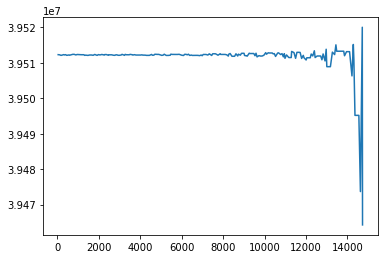

In [45]:
vaccine_data[vaccine_data.Location == 'CA']['Population'].plot()

In [46]:
vaccines_by_state = vaccine_data[vaccine_data['Location'].isin(states)].groupby('Location')
print(len(vaccines_by_state))

51


In [47]:
# evaluate columns to filter before National Aggregation

vaccine_data.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_12Plus',
       'Distributed_Per_100k_18Plus', 'Distributed_Per_100k_65Plus',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Administered_Fed_LTC',
       'Administered_Fed_LTC_Residents', 'Administered_Fed_LTC_Staff',
       'Administered_Fed_LTC_Unk', 'Administered_Fed_LTC_Dose1',
       'Administered_Fed_LTC_Dose1_Residents',
       'Administered_Fed_LTC_Dose1_Staff', 'Administered_Fed_LTC_Dose1_Unk',
       'Admin_Per_100K', 'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_12Plus'

In [48]:
# filter out columns that are percentages or irrelevant to prepare for summation by State to get National Data

vaccine_data_filtered = vaccine_data[[
    'Date',
    'MMWR_week',
    'Location',
    'Distributed',
    'Distributed_Janssen',
    'Distributed_Moderna',
    'Distributed_Pfizer',
    'Distributed_Unk_Manuf',
#     'Dist_Per_100K', 
#     'Distributed_Per_100k_12Plus',
#     'Distributed_Per_100k_18Plus', 
#     'Distributed_Per_100k_65Plus',
    'Administered', 
    'Administered_12Plus', 
    'Administered_18Plus', 
    'Administered_65Plus',
    'Administered_Janssen', 
    'Administered_Moderna', 
    'Administered_Pfizer', 
    'Administered_Unk_Manuf',
#     'Administered_Fed_LTC',
#     'Administered_Fed_LTC_Residents', 
#     'Administered_Fed_LTC_Staff',
#     'Administered_Fed_LTC_Unk', 
#     'Administered_Fed_LTC_Dose1', 
#     'Administered_Fed_LTC_Dose1_Residents',
#     'Administered_Fed_LTC_Dose1_Staff', 
#     'Administered_Fed_LTC_Dose1_Unk',
#     'Admin_Per_100K', 
#     'Admin_Per_100k_12Plus', 
#     'Admin_Per_100k_18Plus', 
#     'Admin_Per_100k_65Plus',
    'Recip_Administered',
    'Administered_Dose1_Recip', #'Administered_Dose1_Pop_Pct',
    'Administered_Dose1_Recip_12Plus', #'Administered_Dose1_Recip_12PlusPop_Pct',
    'Administered_Dose1_Recip_18Plus', #'Administered_Dose1_Recip_18PlusPop_Pct',
    'Administered_Dose1_Recip_65Plus', #'Administered_Dose1_Recip_65PlusPop_Pct',
    'Series_Complete_Yes', #'Series_Complete_Pop_Pct',
    'Series_Complete_12Plus', #'Series_Complete_12PlusPop_Pct',
    'Series_Complete_18Plus', #'Series_Complete_18PlusPop_Pct',
    'Series_Complete_65Plus', #'Series_Complete_65PlusPop_Pct',
    'Series_Complete_Janssen',
    'Series_Complete_Moderna',
    'Series_Complete_Pfizer',
    'Series_Complete_Unk_Manuf',
    'Series_Complete_Janssen_12Plus',
    'Series_Complete_Moderna_12Plus',
    'Series_Complete_Pfizer_12Plus',
    'Series_Complete_Unk_Manuf_12Plus',
    'Series_Complete_Janssen_18Plus',
    'Series_Complete_Moderna_18Plus',
    'Series_Complete_Pfizer_18Plus',
    'Series_Complete_Unk_Manuf_18Plus',
    'Series_Complete_Janssen_65Plus',
    'Series_Complete_Moderna_65Plus',
    'Series_Complete_Pfizer_65Plus',
    'Series_Complete_Unk_Manuf_65Plus',
    #'Series_Complete_FedLTC',
    #'Series_Complete_FedLTC_Residents',
    #'Series_Complete_FedLTC_Staff',
    #'Series_Complete_FedLTC_Unknown',
    'Population',
    'Population1'
]]

vaccine_data_filtered.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus',
       'Series_Complete_Yes', 'Series_Complete_12Plus',
       'Series_Complete_18Plus', 'Series_Complete_65Plus',
       'Series_Complete_Janssen', 'Series_Complete_Moderna',
       'Series_Complete_Pfizer', 'Series_Complete_Unk_Manuf',
       'Series_Complete_Janssen_12Plus', 'Series_Complete_Moderna_12Plus',
       'Series_Complete_Pfizer_12Plus', 'Series_Complete_Unk_Manuf_12Plus',
       'Series_Complete_Janssen_18Plus', 'Series_Complete_Moderna_18Plus',
       'S

In [49]:
# sum state-level totals to get US National totals

US_vaccine_data = vaccine_data_filtered[vaccine_data_filtered['Location'].isin(states)].groupby('Date').sum()
US_vaccine_data['Population_avg'] = US_vaccine_data.Population.mean()
US_vaccine_data.columns

Index(['MMWR_week', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus',
       'Series_Complete_Yes', 'Series_Complete_12Plus',
       'Series_Complete_18Plus', 'Series_Complete_65Plus',
       'Series_Complete_Janssen', 'Series_Complete_Moderna',
       'Series_Complete_Pfizer', 'Series_Complete_Unk_Manuf',
       'Series_Complete_Janssen_12Plus', 'Series_Complete_Moderna_12Plus',
       'Series_Complete_Pfizer_12Plus', 'Series_Complete_Unk_Manuf_12Plus',
       'Series_Complete_Janssen_18Plus', 'Series_Complete_Moderna_18Plus',
       'Series_Complete_Pfize

array([3.28241115e+08])

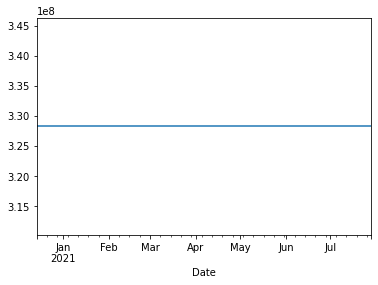

In [50]:
# smooth noise in national population calculation by replacing time-series with average over the period

US_vaccine_data.Population_avg.plot()
US_vaccine_data.Population_avg.unique()

In [51]:
# now, can recreate national % statistics:

US_vaccine_data['Dist_Per_100K'] = US_vaccine_data.Distributed / US_vaccine_data.Population_avg * 100000
US_vaccine_data['Administered_Dose1_Pop_Pct'] = US_vaccine_data.Administered_Dose1_Recip / US_vaccine_data.Population_avg
# US_vaccine_data['Administered_Dose1_Recip_12PlusPop_Pct'] = US_vaccine_data.Administered_Dose1_Recip_12Plus / US_vaccine_data.Population_avg
# US_vaccine_data['Administered_Dose1_Recip_18PlusPop_Pct'] = US_vaccine_data.Administered_Dose1_Recip_18Plus / US_vaccine_data.Population_avg
# US_vaccine_data['Administered_Dose1_Recip_65PlusPop_Pct'] = US_vaccine_data.Administered_Dose1_Recip_65Plus / US_vaccine_data.Population_avg
US_vaccine_data['Series_Complete_Pop_Pct'] = US_vaccine_data.Series_Complete_Yes / US_vaccine_data.Population_avg
# US_vaccine_data['Series_Complete_12PlusPop_Pct'] = US_vaccine_data.Series_Complete_12Plus / US_vaccine_data.Population_avg
# US_vaccine_data['Series_Complete_18PlusPop_Pct'] = US_vaccine_data.Series_Complete_18Plus / US_vaccine_data.Population_avg
# US_vaccine_data['Series_Complete_65PlusPop_Pct'] = US_vaccine_data.Series_Complete_65Plus / US_vaccine_data.Population_avg

US_vaccine_data.columns

Index(['MMWR_week', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus',
       'Series_Complete_Yes', 'Series_Complete_12Plus',
       'Series_Complete_18Plus', 'Series_Complete_65Plus',
       'Series_Complete_Janssen', 'Series_Complete_Moderna',
       'Series_Complete_Pfizer', 'Series_Complete_Unk_Manuf',
       'Series_Complete_Janssen_12Plus', 'Series_Complete_Moderna_12Plus',
       'Series_Complete_Pfizer_12Plus', 'Series_Complete_Unk_Manuf_12Plus',
       'Series_Complete_Janssen_18Plus', 'Series_Complete_Moderna_18Plus',
       'Series_Complete_Pfize

# What’s the nation’s progress on vaccinations?

(0.0, 1.0)

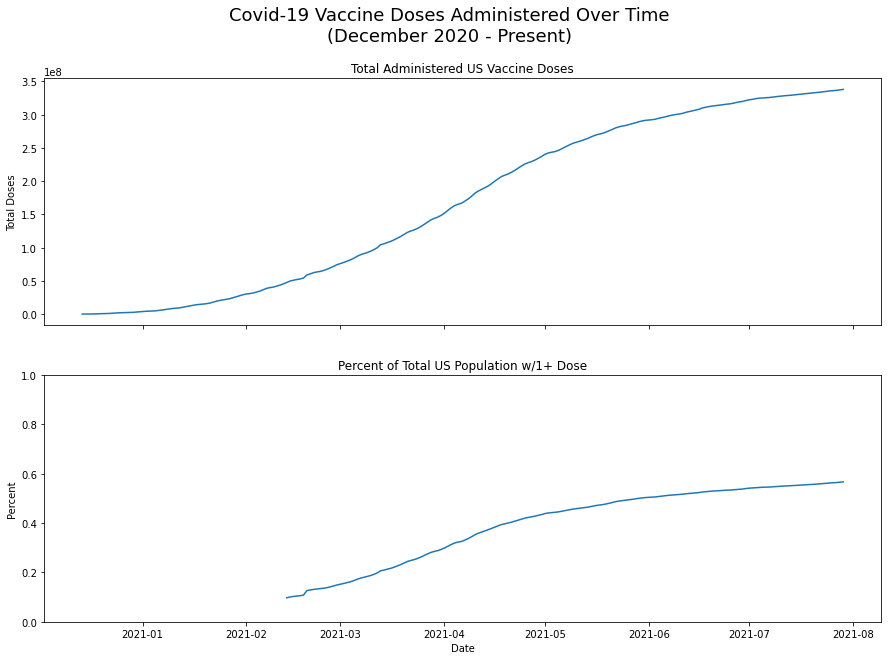

In [52]:
# plot the total administered US vaccinations by date on a scatter plot
fig, ax = plt.subplots(2, 1, figsize = (15,10), sharex=True)
fig.suptitle('Covid-19 Vaccine Doses Administered Over Time\n(December 2020 - Present)', fontsize=18)
# graph of Total Administered Doses in US
ax[0].plot(US_vaccine_data.Administered)
ax[0].set_title('Total Administered US Vaccine Doses')
ax[0].set_ylabel('Total Doses')
# graph of % of US Population w/1+ Dose
ax[1].plot(US_vaccine_data[US_vaccine_data.Administered_Dose1_Pop_Pct > 0].Administered_Dose1_Pop_Pct)
ax[1].set_title('Percent of Total US Population w/1+ Dose')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Percent')
ax[1].set_ylim(0,1)

(0.0, 1.0)

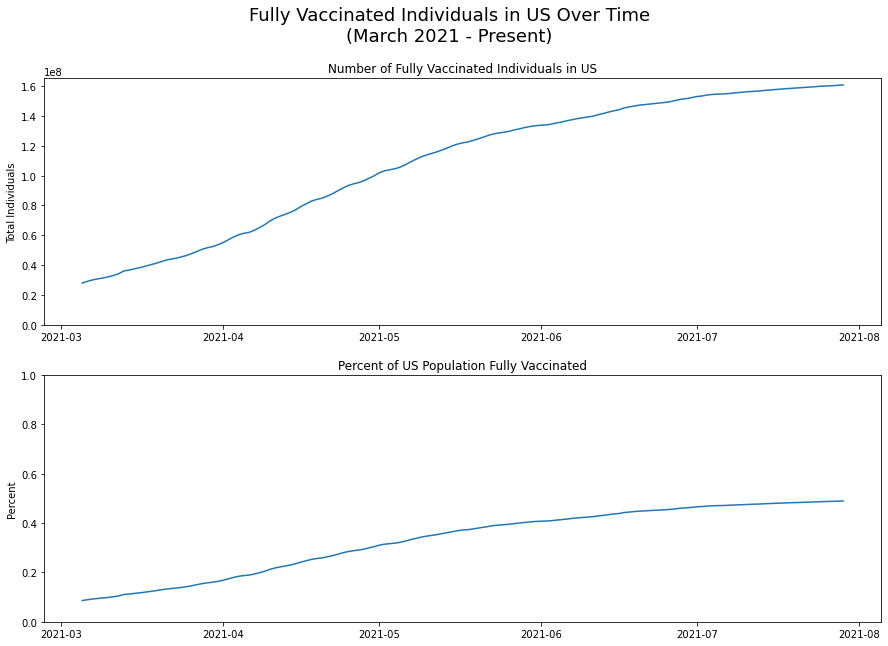

In [53]:
# Plot Fully Vaccinated Individuals Over Time

fig, ax = plt.subplots(2, 1, figsize = (15,10))
fig.suptitle('Fully Vaccinated Individuals in US Over Time\n(March 2021 - Present)', fontsize=18)
# graph of number of fully vaccinated individuals in US
ax[0].plot(US_vaccine_data[US_vaccine_data.Series_Complete_Yes > 0].Series_Complete_Yes)
ax[0].set_title('Number of Fully Vaccinated Individuals in US')
ax[0].set_ylabel('Total Individuals')
ax[0].set_ylim(0,165000000)
# graph of % of US Population fully vaccinated over time
ax[1].plot(US_vaccine_data[US_vaccine_data.Series_Complete_Pop_Pct > 0].Series_Complete_Pop_Pct)
ax[1].set_title('Percent of US Population Fully Vaccinated')
ax[1].set_ylabel('Percent')
ax[1].set_ylim(0,1)

(0.0, 165000000.0)

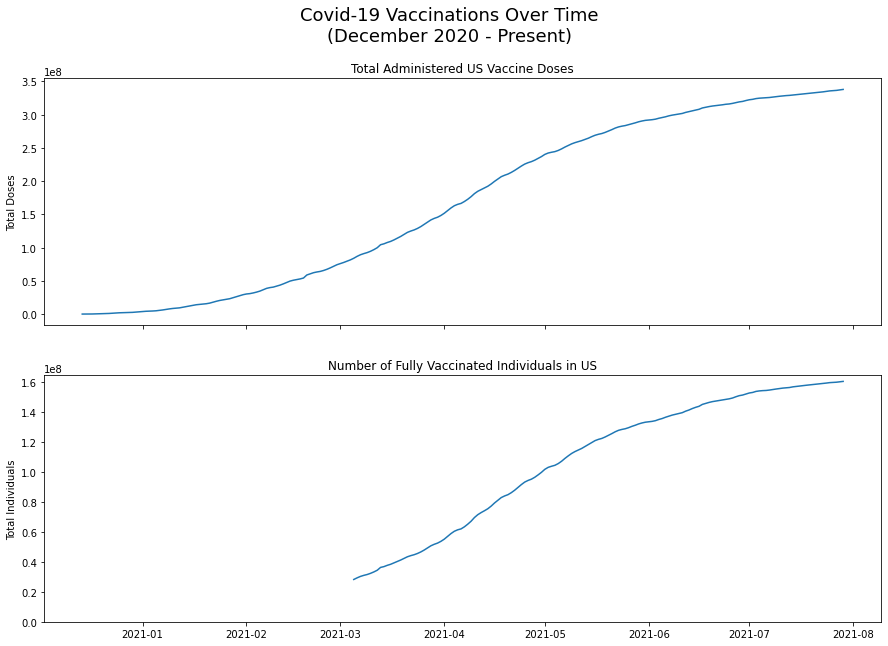

In [54]:
# plot the total administered US vaccinations by date on a scatter plot
fig, ax = plt.subplots(2, 1, figsize = (15,10), sharex=True)
fig.suptitle('Covid-19 Vaccinations Over Time\n(December 2020 - Present)', fontsize=18)
# graph of Total Administered Doses in US
ax[0].plot(US_vaccine_data.Administered)
ax[0].set_title('Total Administered US Vaccine Doses')
ax[0].set_ylabel('Total Doses')
# graph of Total Number Fully Vaccinated Individuals in US
ax[1].plot(US_vaccine_data[US_vaccine_data.Series_Complete_Yes > 0].Series_Complete_Yes)
ax[1].set_title('Number of Fully Vaccinated Individuals in US')
ax[1].set_ylabel('Total Individuals')
ax[1].set_ylim(0,165000000)

# Vaccines: Questions 1 & 2

In [55]:
# Current stats for United States

print(f'Total Doses Administered in US to Date: {US_vaccine_data.Administered.max():,.0f}')
print(f'Total Percent of Individuals in US with 1+ Dose to Date: {US_vaccine_data.Administered_Dose1_Pop_Pct.max()*100:,.2f}%')
print(f'Total Number of Fully Vaccinated Individuals in US to Date: {US_vaccine_data.Series_Complete_Yes.max():,.0f}')
print(f'Total Percent of Fully Vaccinated Individuals in US to Date: {US_vaccine_data.Series_Complete_Pop_Pct.max()*100:,.2f}%')

Total Doses Administered in US to Date: 337,941,314
Total Percent of Individuals in US with 1+ Dose to Date: 56.64%
Total Number of Fully Vaccinated Individuals in US to Date: 160,535,336
Total Percent of Fully Vaccinated Individuals in US to Date: 48.91%


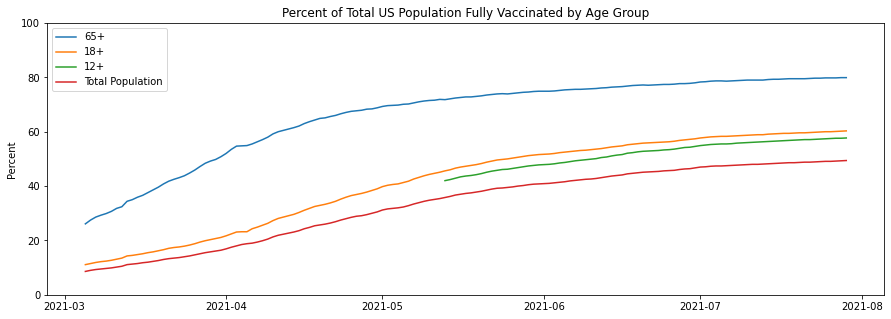

In [56]:
# graph of US population percent fully vaccinated by age bracket:
US_pct_filter = vaccine_data[vaccine_data.Location == 'US'].set_index('Date')
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(US_pct_filter[US_pct_filter.Series_Complete_65PlusPop_Pct > 0].Series_Complete_65PlusPop_Pct, label = "65+")
ax.plot(US_pct_filter[US_pct_filter.Series_Complete_18PlusPop_Pct > 0].Series_Complete_18PlusPop_Pct, label = "18+")
ax.plot(US_pct_filter[US_pct_filter.Series_Complete_12PlusPop_Pct > 0].Series_Complete_12PlusPop_Pct, label = "12+")
ax.plot(US_pct_filter[US_pct_filter.Series_Complete_Pop_Pct > 0].Series_Complete_Pop_Pct, label = "Total Population")
ax.set_title('Percent of Total US Population Fully Vaccinated by Age Group')
ax.set_ylabel('Percent')
ax.set_ylim([0,100])
ax.legend()

In [57]:
# current % of population fully vaccinated by age bracket

print(f'US % of Total Population Fully Vaccinated: {US_pct_filter.Series_Complete_Pop_Pct.max():,.2f}%')
print(f'US % of 65+ Population Fully Vaccinated: {US_pct_filter.Series_Complete_65PlusPop_Pct.max():,.2f}%')
print(f'US % of 18+ Population Fully Vaccinated: {US_pct_filter.Series_Complete_18PlusPop_Pct.max():,.2f}%')
print(f'US % of 12+ Population Fully Vaccinated: {US_pct_filter.Series_Complete_12PlusPop_Pct.max():,.2f}%')

US % of Total Population Fully Vaccinated: 49.40%
US % of 65+ Population Fully Vaccinated: 79.90%
US % of 18+ Population Fully Vaccinated: 60.30%
US % of 12+ Population Fully Vaccinated: 57.70%


In [58]:
# current number of individuals partially vaccinated by age bracket:

print(f'Total US Individuals (All Ages) with 1+ Dose: {US_vaccine_data.Administered_Dose1_Recip.max():,.0f}')
print(f'Total US Individuals Aged 65+ with 1+ Dose: {US_vaccine_data.Administered_Dose1_Recip_65Plus.max():,.0f}')
print(f'Total US Individuals Aged 18+ with 1+ Dose: {US_vaccine_data.Administered_Dose1_Recip_18Plus.max():,.0f}')
print(f'Total US Individuals Aged 12+ with 1+ Dose: {US_vaccine_data.Administered_Dose1_Recip_12Plus.max():,.0f}')

Total US Individuals (All Ages) with 1+ Dose: 185,904,325
Total US Individuals Aged 65+ with 1+ Dose: 48,247,637
Total US Individuals Aged 18+ with 1+ Dose: 175,468,554
Total US Individuals Aged 12+ with 1+ Dose: 185,682,574


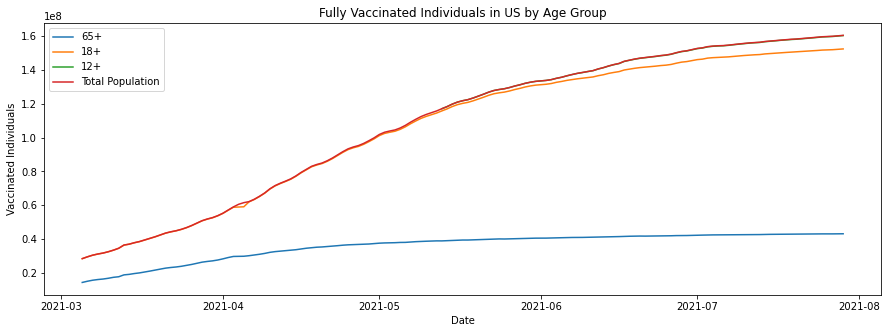

In [59]:
# graph of US population number fully vaccinated

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(US_vaccine_data[US_vaccine_data.Series_Complete_65Plus > 0].Series_Complete_65Plus, label = "65+")
ax.plot(US_vaccine_data[US_vaccine_data.Series_Complete_18Plus > 0].Series_Complete_18Plus, label = "18+")
ax.plot(US_vaccine_data[US_vaccine_data.Series_Complete_12Plus > 0].Series_Complete_12Plus, label = "12+")
ax.plot(US_vaccine_data[US_vaccine_data.Series_Complete_Yes > 0].Series_Complete_Yes, label = "Total Population")
ax.set_title('Fully Vaccinated Individuals in US by Age Group')
ax.set_ylabel('Vaccinated Individuals')
ax.set_xlabel('Date')
ax.legend()

In [60]:
# current number of fully vaccinated individuals in US by age bracket

print(f'Total US Individuals (All Ages) Fully Vaccinated: {US_vaccine_data.Series_Complete_Yes.max():,.0f}')
print(f'Total US Individuals Aged 65+ Fully Vaccinated: {US_vaccine_data.Series_Complete_65Plus.max():,.0f}')
print(f'Total US Individuals Aged 18+ Fully Vaccinated: {US_vaccine_data.Series_Complete_18Plus.max():,.0f}')
print(f'Total US Individuals Aged 12+ Fully Vaccinated: {US_vaccine_data.Series_Complete_12Plus.max():,.0f}')

Total US Individuals (All Ages) Fully Vaccinated: 160,535,336
Total US Individuals Aged 65+ Fully Vaccinated: 42,997,377
Total US Individuals Aged 18+ Fully Vaccinated: 152,492,446
Total US Individuals Aged 12+ Fully Vaccinated: 160,406,189


# Vaccination Analysis: Question 5

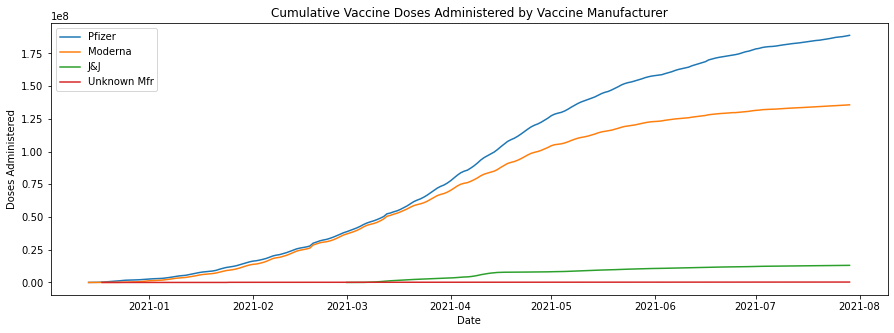

In [61]:
# plot of Doses Administered by Vaccine Manufacturer

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(US_vaccine_data[US_vaccine_data.Administered_Pfizer > 0].Administered_Pfizer, label = "Pfizer")
ax.plot(US_vaccine_data[US_vaccine_data.Administered_Moderna > 0].Administered_Moderna, label = "Moderna")
ax.plot(US_vaccine_data[US_vaccine_data.Administered_Janssen > 0].Administered_Janssen, label = "J&J")
ax.plot(US_vaccine_data[US_vaccine_data.Administered_Unk_Manuf > 0].Administered_Unk_Manuf, label = "Unknown Mfr")
ax.set_title('Cumulative Vaccine Doses Administered by Vaccine Manufacturer')
ax.set_ylabel('Doses Administered')
ax.set_xlabel('Date')
ax.legend()

In [62]:
# current number of fully vaccinated individuals in US by Vaccine Manufacturer
print('Cumulative Doses Administered by Vaccine Manufacturer')
print(f'{"Pfizer":20}{US_vaccine_data.Administered_Pfizer.max():>15,.0f}')
print(f'{"Moderna":20}{US_vaccine_data.Administered_Moderna.max():>15,.0f}')
print(f'{"Johnson & Johnson":20}{US_vaccine_data.Administered_Janssen.max():>15,.0f}')
print(f'{"Unknown Vaccine Mfr":20}{US_vaccine_data.Administered_Unk_Manuf.max():>15,.0f}')

Cumulative Doses Administered by Vaccine Manufacturer
Pfizer                  188,819,532
Moderna                 135,757,170
Johnson & Johnson        13,063,054
Unknown Vaccine Mfr         301,558


In [63]:
# Top 5 Vaccinated States (total vaccinations)
states_total_vaccinated = pd.DataFrame(vaccines_by_state.Series_Complete_Yes.max().sort_values(ascending=False))
states_total_vaccinated.reset_index(inplace=True)
states_total_vaccinated.index = range(1,52)
states_total_vaccinated[:5]

,Location,Series_Complete_Yes
1,CA,20792219
2,TX,12658112
3,NY,11073293
4,FL,10456350
5,PA,6681441


In [64]:
# Bottom 5 Vaccinated States (total vaccinations)
states_total_vaccinated[-5:]

,Location,Series_Complete_Yes
47,SD,414305
48,DC,385290
49,AK,332136
50,ND,304936
51,WY,211609


# Vaccine: Question 2a

In [65]:
# Top 5 Vaccinated States (per capita) and their the Vaccines Distributed per 100k
states_pct_vaccinated = pd.DataFrame(vaccines_by_state.Series_Complete_Pop_Pct.max().sort_values(ascending=False))
states_dist_per_100k = pd.DataFrame(vaccines_by_state.Dist_Per_100K.max())

merged = states_pct_vaccinated.merge(states_dist_per_100k, left_on='Location', right_on='Location')
merged.reset_index(inplace=True)
merged.index=range(1,52)
merged.columns=['State', 'Percent Fully Vaccinated', 'Vaccines Distributed per 100k']
merged[:5]

,State,Percent Fully Vaccinated,Vaccines Distributed per 100k
1,VT,67.4,152110
2,MA,63.7,144883
3,ME,63.4,142153
4,CT,63.1,137907
5,RI,61.3,147143


In [66]:
# Bottom 5 Vaccinated States (per capita) and their the Vaccines Distributed per 100k
merged[-5:]

,State,Percent Fully Vaccinated,Vaccines Distributed per 100k
47,LA,36.8,92111
48,WY,36.6,91039
49,AR,36.2,98991
50,MS,34.4,93603
51,AL,34.2,103006


In [67]:
# Is there a correlation between Vaccination % and Vaccines Distributed to the State?

merged.corr()

,Percent Fully Vaccinated,Vaccines Distributed per 100k
Percent Fully Vaccinated,1.000000,0.895843
Vaccines Distributed per 100k,0.895843,1.000000


# Vaccine: Question 2b

In [68]:
# Top 5 States by percent of population partially vaccinated

states_pct_1dose = pd.DataFrame(vaccines_by_state.Administered_Dose1_Pop_Pct.max().sort_values(ascending=False))
states_pct_1dose.reset_index(inplace=True)
states_pct_1dose.index = range(1,52)
states_pct_1dose.columns = ['State','Percent w/1+ Dose']
states_pct_1dose[:5]

,State,Percent w/1+ Dose
1,VT,75.4
2,MA,72.4
3,HI,71.3
4,CT,69.6
5,ME,68.2


In [69]:
# Bottom 5 States by percent of population partially vaccinated

states_pct_1dose[-5:]

,State,Percent w/1+ Dose
47,AL,42.7
48,LA,41.8
49,WY,41.5
50,ID,41.0
51,MS,39.3


# Vaccine: Question 2c

## 5 states with highest and lowest with fully vaccinated population by manufacturer

In [70]:
# Top 5 and Bottom 5 states: Fully Vaccinated Individuals by Vaccine Manufacturer
Pfizer_top5 = vaccines_by_state.Series_Complete_Pfizer.max().sort_values(ascending=False).index
Pfizer_bot5 = vaccines_by_state.Series_Complete_Pfizer.max().sort_values(ascending=True).index
Moderna_top5 = vaccines_by_state.Series_Complete_Moderna.max().sort_values(ascending=False).index
Moderna_bot5 = vaccines_by_state.Series_Complete_Moderna.max().sort_values(ascending=True).index
JnJ_top5 = vaccines_by_state.Series_Complete_Janssen.max().sort_values(ascending=False).index
JnJ_bot5 = vaccines_by_state.Series_Complete_Janssen.max().sort_values(ascending=True).index
d = {'Pfizer_top5' : Pfizer_top5,
     'Pfizer_bot5' : Pfizer_bot5,
     'Moderna_top5' : Moderna_top5,
     'Moderna_bot5' : Moderna_bot5,
     'JnJ_top5' : JnJ_top5,
     'JnJ_bot5' : JnJ_bot5,
    }
df = pd.DataFrame(data=d)
df.index=range(1,52)
df[:5]

,Pfizer_top5,Pfizer_bot5,Moderna_top5,Moderna_bot5,JnJ_top5,JnJ_bot5
1,CA,WY,CA,WY,CA,WY
2,TX,ND,TX,ND,FL,AK
3,NY,AK,NY,AK,TX,ND
4,FL,DC,FL,DC,NY,SD
5,PA,SD,PA,VT,PA,DC


In [71]:
# Top 5 and Bottom 5 states: Percent Fully Vaccinated by Vaccine Manufacturer
Pfizer_top5_pct = (vaccines_by_state.Series_Complete_Pfizer.max() / vaccines_by_state.Series_Complete_Yes.max()).sort_values(ascending=False).index
Pfizer_bot5_pct = (vaccines_by_state.Series_Complete_Pfizer.max() / vaccines_by_state.Series_Complete_Yes.max()).sort_values(ascending=True).index
Moderna_top5_pct = (vaccines_by_state.Series_Complete_Moderna.max() / vaccines_by_state.Series_Complete_Yes.max()).sort_values(ascending=False).index
Moderna_bot5_pct = (vaccines_by_state.Series_Complete_Moderna.max() / vaccines_by_state.Series_Complete_Yes.max()).sort_values(ascending=True).index
JnJ_top5_pct = (vaccines_by_state.Series_Complete_Janssen.max() / vaccines_by_state.Series_Complete_Yes.max()).sort_values(ascending=False).index
JnJ_bot5_pct = (vaccines_by_state.Series_Complete_Janssen.max() / vaccines_by_state.Series_Complete_Yes.max()).sort_values(ascending=True).index
d = {'Pfizer_top5_pct' : Pfizer_top5_pct,
     'Pfizer_bot5_pct' : Pfizer_bot5_pct,
     'Moderna_top5_pct' : Moderna_top5_pct,
     'Moderna_bot5_pct' : Moderna_bot5_pct,
     'JnJ_top5_pct' : JnJ_top5_pct,
     'JnJ_bot5_pct' : JnJ_bot5_pct,
    }
df = pd.DataFrame(data=d)
df.index=range(1,52)
df[:5]

,Pfizer_top5_pct,Pfizer_bot5_pct,Moderna_top5_pct,Moderna_bot5_pct,JnJ_top5_pct,JnJ_bot5_pct
1,HI,WY,AR,HI,ME,HI
2,VA,AR,WY,VA,FL,WV
3,MO,ME,WV,MO,NV,GA
4,MD,AL,AL,MN,VT,MS
5,MA,MT,MS,MD,UT,OK


# Cases, Deaths, Vaccinations: Questions 1, 2, 3

Text(0, 0.5, 'New Deaths')

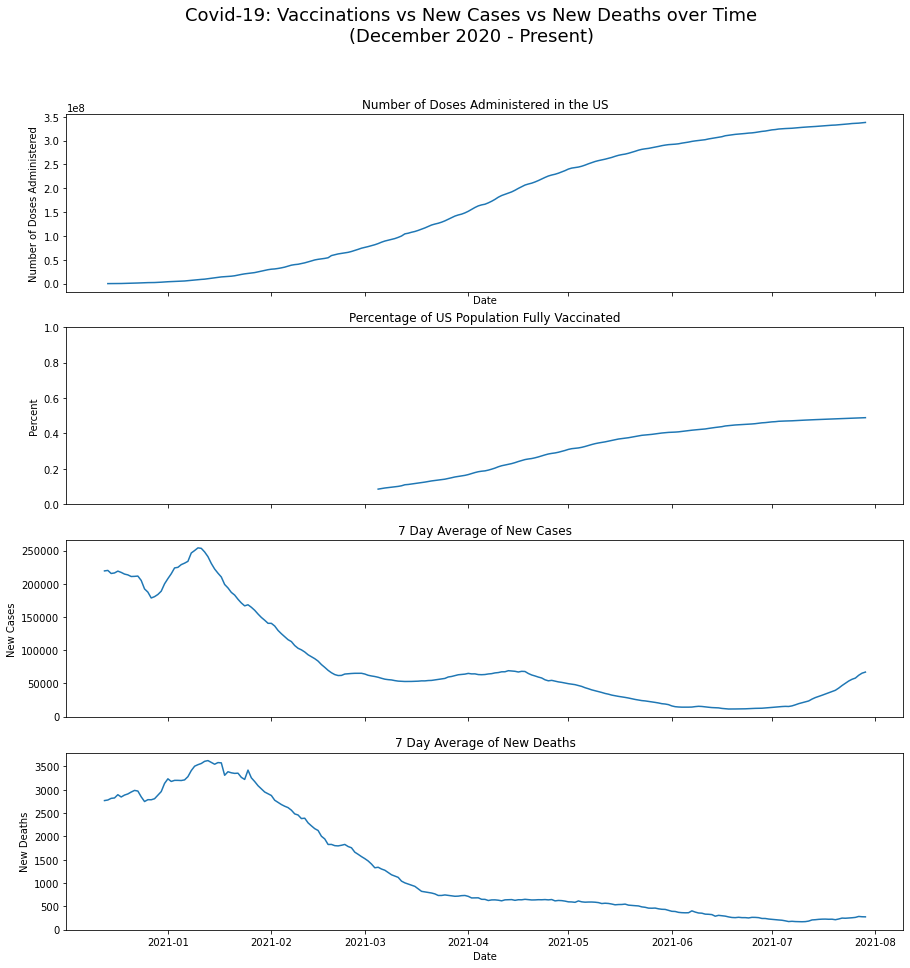

In [72]:
# overlay timeseries of vaccine data, cases, deaths data for period starting January 2021

start_date = vaccine_start_date

fig, ax = plt.subplots(4, 1, figsize = (15,15), sharex=True)
fig.suptitle('Covid-19: Vaccinations vs New Cases vs New Deaths over Time\n(December 2020 - Present)', fontsize=18)
ax[0].plot(US_vaccine_data[start_date:][US_vaccine_data.Administered > 0].Administered)
ax[0].set_title('Number of Doses Administered in the US')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Doses Administered')
ax[1].plot(US_vaccine_data[start_date:][US_vaccine_data.Series_Complete_Pop_Pct > 0].Series_Complete_Pop_Pct)
ax[1].set_title('Percentage of US Population Fully Vaccinated')
ax[1].set_ylabel('Percent')
ax[1].set_ylim([0,1])
ax[2].plot(US_tot_cases_deaths[start_date:].new_case_7day_avg)
ax[2].set_title('7 Day Average of New Cases')
ax[2].set_ylabel('New Cases')
ax[3].plot(US_tot_cases_deaths[start_date:].new_death_7day_avg)
ax[3].set_title('7 Day Average of New Deaths')
ax[3].set_xlabel('Date')
ax[3].set_ylabel('New Deaths')

In [73]:
# Correlation Matrix for US Vaccination Totals, US Vaccination Rates, US New Cases Avg and US New Deaths Avg

d2 = {
    'US New Cases 7-Day Avg': US_tot_cases_deaths[vaccine_start_date:].new_case_7day_avg, 
    'US New Deaths 7-Day Avg': US_tot_cases_deaths[vaccine_start_date:].new_death_7day_avg,
#     'US Total Invididuals Fully Vaccinated': US_vaccine_data[vaccine_start_date:].Series_Complete_Yes,
    'US Percentage of Population Fully Vaccinated': US_vaccine_data[vaccine_start_date:].Series_Complete_Pop_Pct
}
US_cases_deaths_vaccinations_df = pd.DataFrame(data=d2)
US_cases_deaths_vaccinations_df.corr()

,US New Cases 7-Day Avg,US New Deaths 7-Day Avg,US Percentage of Population Fully Vaccinated
US New Cases 7-Day Avg,1.000000,0.936966,-0.766211
US New Deaths 7-Day Avg,0.936966,1.000000,-0.866682
US Percentage of Population Fully Vaccinated,-0.766211,-0.866682,1.000000
